# Simulation (Maths) V2A Lecture Notes - Differential Equations

Deze notebook bevat extra toelichting en uitwerkingen van de formatieve opdrachten voor het wiskunde deel van Simulation voor klas V2A in 2023. Ik gebruik deze om tijdens de les correcte uitwerkingen te delen. Om studenten te kans te geven om ook in hun eigen voorbereidingstijd hiernaar terug te verwijzen heb ik deze publiekelijk aangeboden op [GitLab](https://gitlab.com/hu-hbo-ict/ai/simulation-maths-v2a-2023).

<div style="text-align: right">— Brian</div>

In [60]:
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Les 0

- Introductie
- Opdrachten

<img style="background:white" src="euler.png" width="600">

## Vallende Bal

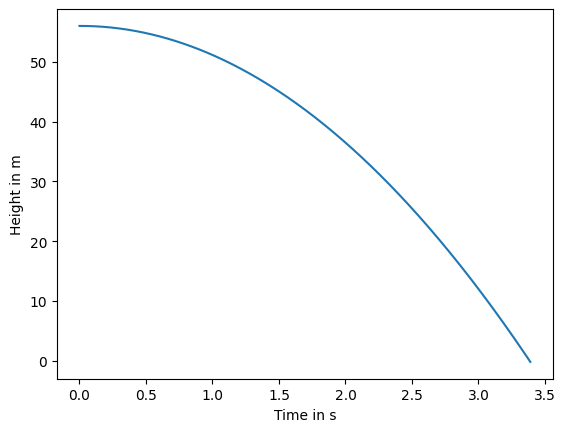

Op t=3.39 ligt de bal op de grond, de uiteindelijke snelheid was -33.26 m/s


In [6]:
h =  0.01   # s
g = -9.81  # m/s²

t = [0]
x = [56]
v = [0]

while x[-1] > 0:
    t.append(t[-1] + h)
    x.append(x[-1] + h * v[-1])
       #                 --------- Dit is dx/dt
    v.append(v[-1] + h * g)
       #                 --------- Dit is dy/dt

plt.plot(t, x)
plt.ylabel('Height in m')
plt.xlabel('Time in s')
plt.show()

print(f"Op t={t[-1]:.2f} ligt de bal op de grond, de uiteindelijke snelheid was {v[-1]:.2f} m/s")

## Oefening in 2D

- Schrijf Python code die de volgende differentiaalvergelijkingen simuleert:

$$\frac{dx}{dt} = \sin{(x)} - y$$
$$\frac{dy}{dt} = x + \exp{(-y)}$$

- Ga uit van een startpunt $(1, -1)$, een stapgrootte $h=0.1$ en simuleer $20$ tijdseenheden (dus $\frac{20}{0.1} = 200$ stappen)

- Tips:
  - In het vorige voorbeeld hielden we $t$ bij om $x$ tegen $t$ te plotten
  - Hier kun je $x$ en $y$ op de beide assen zetten en is $t$ niet zichtbaar
  - Net hadden we een `while` loop tot de bal op de grond lag, hier hebben we een `for` loop met een vast aantal stappen.

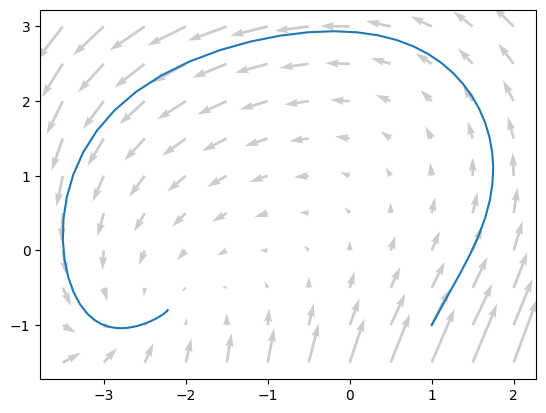

In [3]:
STREAM, QUIVER = 1, 2

plot_decor = 2

h = 0.1
total_time = 20
num_steps = int(total_time / h)

x = [1]
y = [-1]

for step in range(1, num_steps+1):
    dx_dt = np.sin(x[step-1]) - y[step-1]
    dy_dt = x[step-1] + np.exp(-y[step-1])
    
    x.append(x[step-1] + h * dx_dt)
    y.append(y[step-1] + h * dy_dt)
    
x_grid = np.arange(-3.5, 2.1, 0.5)
y_grid = np.arange(-1.5, 3.1, 0.5)
X,Y = np.meshgrid(x_grid, y_grid)
Ex = np.sin(X) - Y
Ey = X + np.exp(-Y)

if plot_decor == QUIVER:
    plt.quiver(X,Y,Ex,Ey, linewidth=None, color='#cccccc')
elif plot_decor == STREAM:
    plt.streamplot(X, Y, Ex, Ey, density=1.0, linewidth=None, color='#ee88ff')


plt.plot(x,y)
plt.show()

## Autowaarde

Op $t = 2023$ koop je een auto. Per tijdseenheid (een jaar) wordt de auto ongeveer $10\%$ minder waard.
 - Stel de differentiaalvergelijk op
 - Pas forward Euler toe
 - Bereken de waarde van de auto na 10 jaar als je hem nu koopt voor € 30.000,-


### Uitwerking
  - Op $t = 2023$ koop je een auto. Per tijdseenheid (een jaar) wordt de auto ongeveer $10\%$ minder waard.
  - Stel de differentiaalvergelijk op
 $$\frac{dW(t)}{dt} = -0.1 W(t)$$
 - Pas forward Euler toe
 $$W(t+h) = W(t) + h \big(-0.1 \cdot W(t)\big)$$
 - Bereken de waarde van de auto na 10 jaar als je hem nu koopt voor € 30.000,-

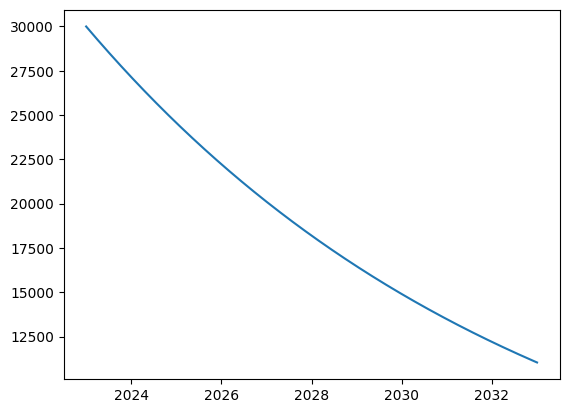

11034.871229216002


In [4]:
aantal_jaar = 10 # jaar
h = 1/365        # 1 dag
time = [2023]
worth = [30000]
for t in range(int(10/h)):
    time.append(time[-1] + h)
    worth.append(worth[-1] + h * -0.1 * worth[-1])

plt.plot(time, worth)
plt.show()
print(worth[-1])

## Mieren

Op een berg wonen mieren. Iedere maand legt de koningin $1000$ eieren (d.w.z. nieuwe mieren). $20\%$ van de mieren wordt iedere maand opgegeten door de miereneter. In maand 4 $(t = 4)$ zijn er $800$ mieren.
 - Stel differentiaalvergelijking op
 - Pas forward Euler toe
 - Bereken het aantal mieren op $t = 5$, $t = 6$, $\dots$, $t = 20$.
 

### Uitwerking
Stel de differentiaalvergelijking op
$$\frac{dA(t)}{dt} = 1000 - 0.2 \cdot A(t)$$

Pas forward Euler toe
$$A(t+h) = A(t) + h \big(1000 - 0.2 \cdot A(t)\big)$$

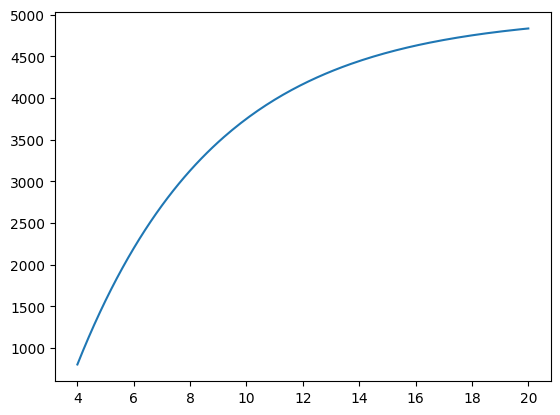

In [110]:
aantal_maanden = 16 # maanden
h = 1/10            # 1 dag
population = [800]
time = [4]

for t in range(int(aantal_maanden/h)):
    time.append(time[-1] + h)
    population.append(population[t] + h * (1000 - 0.2 * population[t]))

plt.plot(time, population)
plt.show()
# print(population[1*30], population[2*30], population[16*30])

population_euler = population

## Chemische Oplossing

In een groot vat is $8$ kg chemische stof opgelost in water. Per uur tijd wordt $15\%$ van de aanwezige chemische stof weggespoeld, terwijl er per uur $5$ kg van deze stof wordt toegevoegd.

 - Stel differentiaalvergelijking op en pas forward Euler toe
 - Hoeveel kg van de chemische stof is na $10$ uur in het vat aanwezig? En na $50$ uur?
 - Plot de tijdgrafiek. Treed er verzadiging op (maximale hoeveelheid van de stof bereikt)?
 

### Uitwerking

Stel de differentiaalvergelijking op
$$\frac{dC(t)}{dt} = 5 - 0.15 \cdot C(t)$$

Pas forward Euler toe
$$C(t+h) = C(t) + h \big(5 - 0.15 \cdot C(t)\big)$$

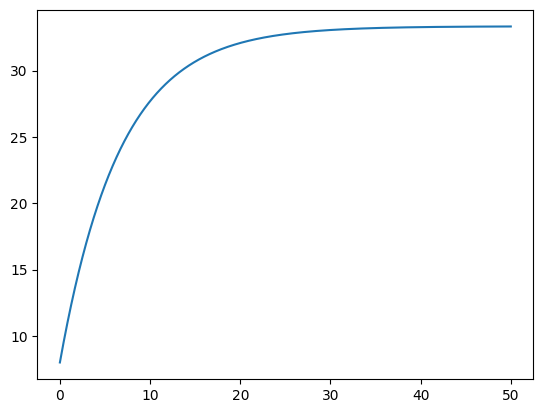

33.31945282363412


In [6]:
aantal_uur = 50 # uur
h = 1/60        # 1 minuut
time = [0]
chemical = [8]
for t in range(int(aantal_uur/h)):
    time.append(time[-1] + h)
    chemical.append(chemical[t] + h * (5 - 0.15 * chemical[t]))

plt.plot(time, chemical)
plt.show()
print(chemical[-1])

# Les 1 - Tweede-orde differentiaalvergelijkingen

## Agenda

- Terugblik les 1
- Wooclap
- Wat zijn tweede-orde DEs?
- Veerbeweging
    - Formatieve Inleveropdracht
- Casus: Apollo 13

## Tweede-orde Differentiaalvergelijkingen

- Vorige les al een voorbeeld gezien: de vallende bal
- Waarom tweede-orde?
  - Snelheid is de afgeleide van positie: $\frac{dx}{dt} = v(t)$
  - Versnelling is de afgeleide van snelheid: $\frac{dv}{dt} = \frac{d^2x}{dt^2} = a(t)$
  - *Versnelling is de tweede afgeleide van positie*
  - In dit voorbeeld was $a(t)$ constant, maar versnelling kan ook toenemen of afnemen (raketlancering, gaspedaal)
- Wat doen we met een tweede-orde vergelijking
  - Effectief twee losse vergelijkingen (met afhankelijkheden)
  - Makkelijker dan Euler's algoritme omdenken naar $\frac{d^2x}{dt^2}$

## Voorbeeld: RLC Circuit

$$L \frac{d^2I}{dt^2} + R \frac{dI}{dt} + \frac{I(t)}{C} = \frac{1}{C} \frac{dV}{dt}$$

We gaan er even vanuit dat $\frac{dV}{dt} = 0$, oftewel dat we het voltage op dit circuit constant houden. Ook zetten we de weerstand op $0 \Omega$:

$$L \frac{d^2I}{dt^2} + \frac{I(t)}{C} = 0$$

Als we de tweede term van beide kanten aftrekken en delen door L krijgen we:

$$\frac{d^2I}{dt^2} = \frac{-I(t)}{CL} $$

De tweede-orde vergelijking staat in een werkbare vorm. We introduceren een tussenstap het aantal ampere per seconde:

$$\frac{d\dot I}{dt} = \frac{-I(t)}{CL}$$
$$\frac{dI}{dt} = \dot I(t)$$

## Oefening: Vallende Bal

*(vorige les als voorbeeld gezien)*

- Positie is afhankelijk van tijd en snelheid
- Snelheid is afhankelijk van versnelling en tijd
- Versnelling door zwaartekracht is constant

$$\frac{d^2x}{dt^2} = -9.81$$

### Uitwerking

$$\frac{dx}{dt} = v(t)$$
$$\frac{dv}{dt} = -9.81$$

## Oefening: Veerbeweging

Schrijf de onderstaande tweede-orde vergelijking voor de positie van een bal aan een veer in twee vergelijkingen: die voor de verandering in $x$ en die voor de verandering in de snelheid $v$.

$$\frac{d^2x}{dt^2} = \frac{-k}{m}x(t)$$

### Uitwerking

$$\frac{dv}{dt} = \frac{-k}{m}x(t)$$
$$\frac{dx}{dt} = v(t)$$

### Programmeren

- Programmeer dit uit op basis van de voorbeeldcode
- Wat gebeurt er als $v(0) = 5 ms^{-1}$?
- Wat gebeurt er als $m = 20 kg$?

<span style="color: #0066aa; font-weight: 700">De code die we zojuist hebben aangevuld vormt de eerste stap van de eerste formatieve opgave. Zorg dat je de GitHub Classroom hebt geactiveerd, maak een lokale clone, en voeg de code die je hebt toe.</span>

In [ ]:
h = 0.01

# veerconstante
k     = 1  # N / m   =  kg ⋅ m / s² / m  =  kg / s² 
massa = 2  # kg  

num_steps = 2000
t = [0]
x = [1]
v = [0]

for step in range(1, num_steps + 1):
    # Vul dit in
    pass

axes_height = plt.subplot(211)
plt.plot(t, x)
axes_velocity = plt.subplot(212)
plt.plot(t, v)
axes_height.set_ylabel('Height in m')
axes_velocity.set_ylabel('Velocity in m/s')
axes_velocity.set_xlabel('Time in s')
plt.show()

## Casus: Apollo 13

![](apollo.png)

### Stap 1: De maan

![](moon.png)

- De aarde bevindt zich in dit referentiekader op $(0, 0)$
- Voor de maan geldt (bij benadering):
 $$x(t) = 384 \cdot 10^6 \cdot \cos{\left(\frac{2 \pi t}{27}\right)}$$
 $$y(t) = 384 \cdot 10^6 \cdot \sin{\left(\frac{2 \pi t}{27}\right)}$$
- $t$ is de tijd in dagen, $x$ en $y$ zijn in meters.
- Is dit een differentiaalvergelijking? Waarom (niet)?
- Programmeer een simulatie om de positie van de maan te bepalen. Doe dit voor $27$ dagen, met $50$ stappen. Bereken een lijst of array van $x$ en $y$ posities en plot deze.

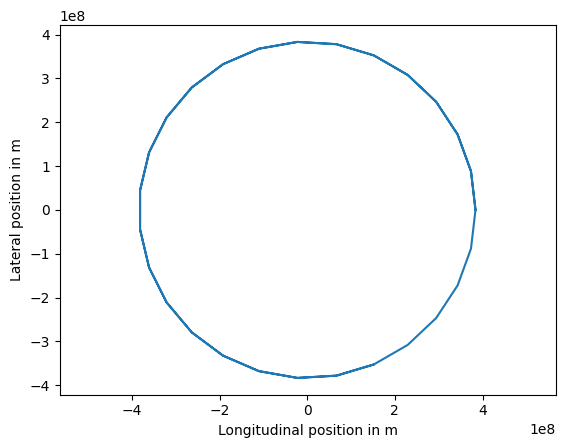

In [51]:
# Op verzoek van de klas: omgeschreven naar Numpy arrays in plaats van lijsten/append.

moon_distance = 384e6 # m

num_steps = 50
x = np.zeros((num_steps,2))

for step in range(num_steps):
    x[step][0] = (moon_distance * np.cos(2 * np.pi * step / 27))
    x[step][1] = (moon_distance * np.sin(2 * np.pi * step / 27))

plt.axis('equal')
plt.plot(x[:,0], x[:,1])
axes = plt.gca()
axes.set_xlabel('Longitudinal position in m')
axes.set_ylabel('Lateral position in m')
plt.show()

### Stap 2: Apollo 13

- We programmeren de positie van Apollo 13 in een vaste baan om de aarde. Gebruik hiertoe de gegeven code als basis.
$$\frac{d^2\vec p}{dt^2} = -\frac{Gm}{r(t)^3} \cdot \vec p (t)$$
- $\vec p(t)$ is de positie, een 2D vector, ook wel $x(t)$ en $y(t)$ als componenten
- $m$ is de massa van de aarde
- $G$ is de gravitatieconstance $6.67\cdot 10^{-11} N \cdot m^2 / kg^2$
- $r(t) = \lVert \vec p \rVert = \sqrt{p_x(t)^2 + p_y(t)^2}$

- $\vec v(t)$ is de snelheid, een 2D vector, die bestaat uit de twee afgeleiden
$$\vec v = \begin{bmatrix}
\frac{dx}{dt} \\
\frac{dy}{dt}
\end{bmatrix}$$

- $\vec a(t)$ is de versnelling, een 2D vector, die bestaat uit de twee tweede afgeleiden. Deze houden we niet bij, maar wordt berekend aan de hand van de positie. De punt in de formule is een scalaire vermenigvuldiging, geen inwendig product ($\frac{Gm}{r(t)^3}$ is een scalar, geen vector).

$$\vec a = \begin{bmatrix}
\frac{d^2 x}{dt^2} \\
\frac{d^2 y}{dt^2}
\end{bmatrix} = \begin{bmatrix}
\frac{dv_x}{dt} \\
\frac{dv_y}{dt}
\end{bmatrix} = - \frac{Gm}{r(t)^3} \cdot \begin{bmatrix}
x(t) \\
y(t)
\end{bmatrix}$$

### Euler
$$x(t + h) = x(t) + h \cdot v_x(t)$$
$$v_x(t+h) = v_x(t) - h \cdot \frac{Gm}{r(t)^3} \cdot x(t)$$
$$y(t + h) = y(t) + h \cdot v_y(t)$$
$$v_y(t+h) = v_y(t) - h \cdot \frac{Gm}{r(t)^3} \cdot y(t)$$

- De differentiaalvergelijking in dit voorbeeld werkt op een 2D vectoren. Wij splitsen deze op in een $x$ en $y$ component die we apart behandelen. Om de twee componenten op te slaan kun je een Numpy array gebruiken met 2 kolommen (en een rij per tijdspunt). Same voor $v$.

- Voor het berekenen van $r$ zijn wel beide componenten nodig. We kunnen de laatst-berekende rij steeds als vector meegegven.

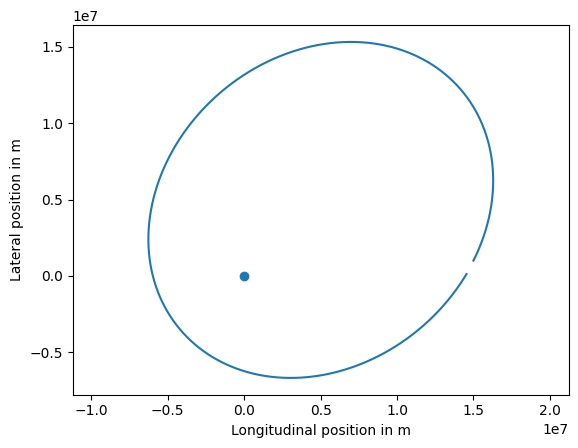

In [19]:
h                      = 0.1       # s
earth_mass             = 5.97e24   # kg
gravitational_constant = 6.67e-11  # N ⋅ m² / kg

def acceleration(x):
    vector_to_earth = - x # earth at origin
    return gravitational_constant * earth_mass / np.linalg.norm(vector_to_earth) ** 3 * vector_to_earth

num_steps = 130000

x = [np.array([15e6,1e6])]
v = [np.array([2e3,4e3])]

for i in range(0, num_steps):
    # a = acceleration(x[-1])
    x.append(x[-1] + h * v[-1])
    v.append(v[-1] + h * acceleration(x[i]))
    
plt.plot(list(map(lambda x: x[0], x)), list(map(lambda x: x[1], x)))
plt.scatter(0, 0)
plt.axis('equal')
axes = plt.gca()
axes.set_xlabel('Longitudinal position in m')
axes.set_ylabel('Lateral position in m')
plt.show()

# Les 2 - Heun's methode

## Agenda

- Terugblik les 1
- Wooclap
- Wat is er mis met Euler?
- Heun's Methode en tweede-orde solvers
- Truncation Error en Adaptieve Stapgrootte

## Wat is er mis met Euler?


- Nauwkeurigheid van Euler is afhankelijk van de stapgrootte
  - Dit geldt voor iedere vorm van numeriek integereren...
  - ... maar de mate van impact kan wel kleiner
- Aanname Euler: de stap op punt $t$ is een goede voorspelling voor de afgeleide in het stuk $(t, t+h)$
  - Pas als we op $t+h$ aankomen berekenen we een nieuwe richting

<img style="height: 300px; width: auto; background:white" src="euler.png" width="600">

## Heun's Methode
- Aanname (ook voor Euler): de perfecte lijn (stapgrootte is $\frac{1}{\infty}$) is continu, dus zonder gaten of hoeken.
- Dus eigenlijk hebben we 2 indicatoren voor de richting:
    - Benaderde afgeleidde op $t$
    - Benaderde afgeleidde op $t+h$
        - Hiervoor moeten we eerst Euler gebruiken om daar te komen, maar het is niet de final answer!
    - Deze twee samen geven een beter beeld dan either one, dus we nemen het gemiddelde.

## Voorbeeld: Autowaarde

Op $t = 2023$ koop je een auto. Per tijdseenheid (een jaar) wordt de auto ongeveer $10\%$ minder waard.
De differentiaalvergelijking is
 $$\frac{dW(t)}{dt} = -0.1 W(t)$$
Forward Euler geeft
 $$W(t+h) = W(t) + h \big(-0.1 \cdot W(t)\big)$$

<img src="euler_error1.png" width="400">

### Pas Heun's methode toe

- Bepaal de verandering aan het begin van de interval:
$$\frac{dW}{dt}(t) = \color{green}{-0.1 \cdot W(t)} $$ 
- Bepaal de verandering aan het einde van de interval:
$$\frac{dW}{dt}(t+h) = \color{skyblue}{-0.1 \cdot W(t+h)} $$ 

Om achter $\frac{dW}{dt}(t+h)$ te komen hebben we eerst een schatting van $W(t+h)$ nodig, met (forward) Euler:

$$W(t+h) = \color{red}{W(t) + h \big(-0.1 \cdot W(t)\big)}$$

Dus

$$\frac{dW}{dt}(t+h) = \color{skyblue}{ -0.1 \cdot \left( { \color{red}{ W(t) + h \left( -0.1 \cdot W(t) \right) } } \right) }$$ 

- Neem het gemiddelde van de voorspelling aan het begin en eind

$$W(t+h) = W(t) + h \cdot \left( \frac{ { \color{green}{\left(-0.1 \cdot W(t)\right)} } +
\color{skyblue}{ -0.1 \cdot  \left( { \color{red}{W(t) + h \left( -0.1 \cdot W(t) \right) } } \right) }
}{2} \right)$$

<img src="euler_error2.png" width="400">

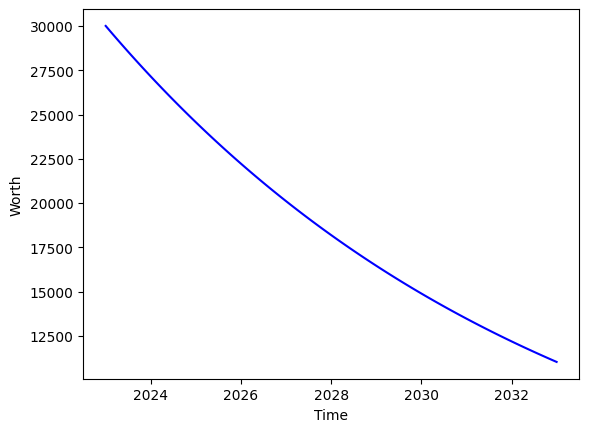

11036.511772819431


In [100]:
aantal_jaar = 10 # jaar
h = 1/12         # 1 dag
time = [2023]
worth = [30000]
err = [None]
ERR = False

for t in range(int(10/h)):
    time.append(time[-1] + h)
    
    dw_dt_euler = - 0.1 * worth[-1]        # €/j - De afgeleide op tijd t benaderd via Euler
    euler = worth[-1] + h * dw_dt_euler    # €   - De waarde op tijd t+h volgens Euler
    
    dw_dt_twee = - 0.1 * euler             # €/j - De afgeleide op tijd t+h benaderd via Euler

    dw_dt = (dw_dt_euler + dw_dt_twee) / 2 # €/j - Gemiddelde van de waardedaling op tijd t en t+h
    heun  = worth[-1] + h * dw_dt          # €   - De waarde op tijd t+h volgens Heun

    if ERR: # Calculate, print and store truncation erros
        diff = np.abs(heun - euler)
        print(f"Error (difference between Euler and Heun) = {diff}")
        err.append(diff)
    
    worth.append(heun)


fig, ax1 = plt.subplots()

ax1.plot(time, worth, 'b', label='R')
ax1.set_xlabel("Time")
ax1.set_ylabel("Worth", color='b' if ERR else 'k')

if ERR:
    ax1.tick_params(axis='y', labelcolor='b')
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax2.set_ylabel('Error', color='r')
    plt.plot(time, err, 'r', label='F')
    
    ax2.tick_params(axis='y', labelcolor='r')

plt.show()
print(worth[-1])

## Opdrachten
We gaan de oefeningen uit de eerste les nog een keer bekijken, maar nu met Heun's methode.

## Mieren

Op een berg wonen mieren. Iedere maand legt de koningin $1000$ eieren (d.w.z. nieuwe mieren). $20\%$ van de mieren wordt iedere maand opgegeten door de miereneter. In maand 4 $(t = 4)$ zijn er $800$ mieren.

De differentiaalvergelijking is
$$\frac{dA(t)}{dt} = 1000 - 0.2 \cdot A(t)$$
Forward Euler geeft
$$A(t+h) = A(t) + h \big(1000 - 0.2 \cdot A(t)\big)$$

<span style="color: #0066aa; font-weight: 700">Pas Heun's methode toe</span>

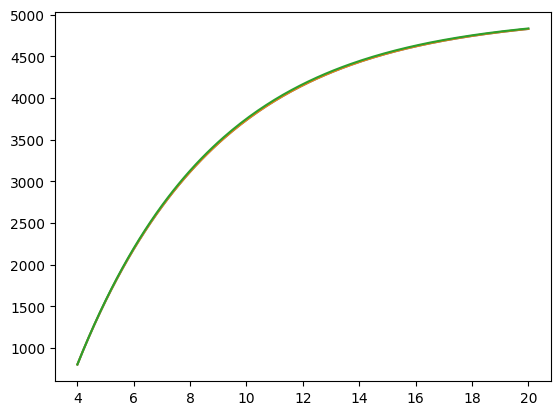

Heun 1561.2842946004266 2184.5795946281696 4828.761664115192
Fake Euler 1561.9859301248907 2185.1540529847034 4828.796603583848
Euler 1568.2942110723031 2196.0465186286033 4834.26226431655
161 161 161


In [113]:
aantal_maanden = 16 # maanden
h = 1/10            # 1 dag
population = [800]
population_fake_euler = [800]
time = [4]

for t in range(int(aantal_maanden/h)):
    time.append(time[-1] + h)

    dm_dt_0h = 1000 - 0.2 * population[t]
    
    euler = population[t] + h * dm_dt_0h
    
    dm_dt_1h = 1000 - 0.2 * euler

    dm_dt = (dm_dt_0h + dm_dt_1h) / 2

    heun = population[t] + h * dm_dt

    population_fake_euler.append(euler)
    population.append(heun)
    # population_euler -> zie boven

plt.plot(time, population)
plt.plot(time, population_fake_euler)
plt.plot(time, population_euler)
plt.show()

print("Heun", population[1*10], population[2*10], population[16*10])
print("Fake Euler", population_e[1*10], population_e[2*10], population_e[16*10])
print("Euler", population_euler[1*10], population_euler[2*10], population_euler[16*10])
print(len(population), len(population_e), len(population_euler))

## Chemische Oplossing

In een groot vat is $8$ kg chemische stof opgelost in water. Per uur tijd wordt $15\%$ van de aanwezige chemische stof weggespoeld, terwijl er per uur $5$ kg van deze stof wordt toegevoegd.

De differentiaalvergelijking is
$$\frac{dC(t)}{dt} = 5 - 0.15 \cdot C(t)$$

Forward Euler geeft
$$C(t+h) = C(t) + h \big(5 - 0.15 \cdot C(t)\big)$$

<span style="color: #0066aa; font-weight: 700">Pas Heun's methode toe</span>

In [ ]:
aantal_uur = 50 # uur
h = 1/60        # 1 minuut
time = [0]
chemical = [8]
for t in range(int(aantal_uur/h)):
    time.append(time[-1] + h)
    euler = chemical[t] + h * (5 - 0.15 * chemical[t])
    # TODO

plt.plot(time, chemical)
plt.show()
print(chemical[-1])

## Truncation Error en Adaptieve Stapgrootte
- We hebben nu twee verschillende benaderingen op 1 punt
- Heun is een orde nauwkeuriger dan Euler (denk linear vs kwadratische error)
- Dit maakt op rechte stukken (vrijwel) niet uit, maar "in de bochten" wel!
- Het verschil tussen de twee vertelt on iets:
    - Als het verschil klein is, was Euler een goede voorspeller, en zitten we op een recht stuk.
    - Als het verschil groot is, was Euler significant slechter dan Heun, en zitten we in een bocht.
- Hiermee kunnen we onze stapgrootte aanpassen:
    - Rechte stukken $\to$ grote stappen
    - Bochten $\to$ kleinere stapjes (opletten!)

## Huiswerk
- Maak de oefeningen met Heun af (mieren en chemisch vat)
- Maak de veerbeweging af <span style="color: #0066aa; font-weight: 700">(formatieve inleveropdracht!)</span> en lever deze voor vrijdagmiddag in
- Maak de oefeningen van Canvas (orbit, $e$)

# Les 3

## Agenda

- Terugblik les 2
- Wooclap
- Orbit
- SIR model

## Casus: Orbit

We drukken de funcite $a(t)$ hier voor het gemak uit als een functie van $a(x, y)$. De reden is dat de functie de tijd eigenlijk alleen nodig heeft om de positie op dat tijdstip te bepalen. Als we straks met Heun aan de gang gaan en vooruit gaan kijken naar hypotethishe stappen wordt dit snel verwarrend. Als we de functie uitdrukken in de $x$ en $y$ maakt het niet langer uit bij welk tijdstip (if any) deze horen.

Tevens vectoriseren we de vergelijkingen om deze zo compact en overzichtelijk mogelijk te houden, zodat we bij het toepassen van Heun kunnen zien wat er gebeurt.

$$a_x(x, y) = - \frac{GM}{ \left(\sqrt{x^2+y^2}\right) ^3} x \qquad \text{en} \qquad a_y(x, y) = - \frac{GM}{ \left(\sqrt{x^2+y^2}\right) ^3} y$$
in vector vorm
$$\vec a(\vec p) = - \frac{GM}{ \lVert \vec p \rVert ^3} \vec p$$

### Euler
$$x(t + h) = x(t) + h \cdot v_x(t) \qquad \text{en} \qquad y(t + h) = y(t) + h \cdot v_y(t)$$
in vector vorm
$$\vec p(t+h) = \vec p(t) + h \cdot \vec v(t)$$

#### Snelheid
$$v_x(t+h) = v_x(t) + h \cdot a_x(x(t), y(t)) \qquad \text{en} \qquad v_y(t+h) = v_y(t) + h \cdot a_y(x(t), y(t))$$
in vector vorm
$$\vec v(t+h) = v(t) + h \cdot \vec a(\vec p(t))$$

### Heun

$$\vec p(t+h) = \vec p(t) + h \cdot \frac{\vec v(t) + \vec {v_e} }{2} $$

$$\vec v(t+h) = \vec v(t) + h \cdot \frac{\vec a(\vec p (t)) + \vec a(\vec p_e) }{2} $$

waar we onze tussentijdse Euler voorspelling aanduiden als $\vec{p_e}$ en $\vec{v_e}$

$$\vec {p_e} = \vec p(t) + h \cdot \vec v(t)$$
$$\vec {v_e} = \vec v(t) + h \cdot \vec a(t)$$




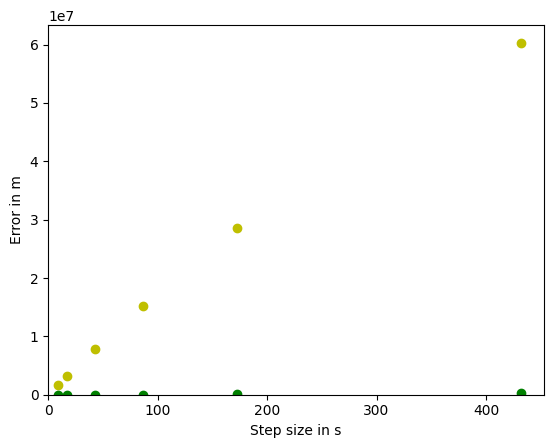

In [114]:
total_time = 24 * 3600 # s
g = 9.81 # m / s2
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2
radius = (gravitational_constant * earth_mass * total_time ** 2 / 4 / math.pi ** 2) ** (1/3) # m
speed = 2.0 * math.pi * radius / total_time # m / s

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth at origin
    return gravitational_constant * earth_mass / np.linalg.norm(vector_to_earth) ** 3 * vector_to_earth


def heuns_method(num_steps):
    ### Old Euler Method
    h = total_time / num_steps
    x = np.zeros([num_steps + 1, 2]) # two-dimensional array to store results
    v = np.zeros([num_steps + 1, 2])
    t = np.zeros(num_steps + 1)

    x[0, 0] = radius # three o'clock position
    v[0, 1] = speed # only upwards motion at start

    for step in range(num_steps):
        t[step + 1] = t[step] + h
        x[step + 1] = x[step] + h * v[step]
        v[step + 1] = v[step] + h * acceleration(x[step])
    # End Euler Method

    x_euler = x.copy()
    v_euler = v.copy()

    error_E = np.linalg.norm(x[-1] - x[0]) # difference between end position and start position
    plt.scatter(h, error_E, color = 'y')

    ### Heun's Method
    for step in range(num_steps):
        a = acceleration(x[step])
        x_E = x[step] + h * v[step]
        v_E = v[step] + h * a
        x[step + 1] = x[step] + h * 0.5 * (v[step] + v_E)
        v[step + 1] = v[step] + h * 0.5 * (a + acceleration(x_E))
    # End Heun's Method

    error_H = np.linalg.norm(x[-1] - x[0])
    plt.scatter(h, error_H, c = 'g')
    
    return t, x, v, x_euler, v_euler


for num_steps in [10000, 5000, 2000, 1000, 500, 200]:
    t, x, v, x_E, v_E = heuns_method(num_steps)

plt.xlim(xmin = 0.)
plt.ylim(ymin = 0.)
axes = plt.gca()
axes.set_xlabel('Step size in s')
axes.set_ylabel('Error in m')
plt.show()

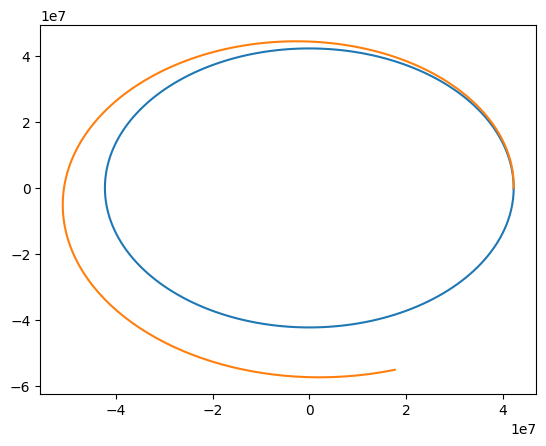

In [97]:
plt.plot(x[:,0], x[:,1])
plt.plot(x_E[:,0], x_E[:,1])
plt.show()

## SIR model

- We modeleren een epidemie of pandemie. De populatie wordt onderverdeeld in drie categorien.
  - Susceptable (nog niet ziek geweest, besmetbaar)
  - Infected (ziek - besmettelijk)
  - Removed (genezen / overleden - niet meer besmettelijk of besmetbaar)
- Mensen kunnen van S naar I gaan, of van I naar R. Mensen kunnen in de huidige categorie blijven.
- De ratio van S naar I hangt af van I en een reproductiegetal
- De ratio van I naar R is constant

![](SIR.png)

$$S(t+h) = S(t) + h \cdot \frac{-5\times 10^{-9}}{day \cdot person} I(t) S(t)$$
$$I(t+h) = I(t) + h \cdot \left(\frac{5\times 10^{-9}}{day \cdot person} I(t) S(t) - \frac{1}{5\ days} I(t)\right)$$
$$R(t+h) = R(t) + h \cdot \frac{1}{5\ days} I(t)$$

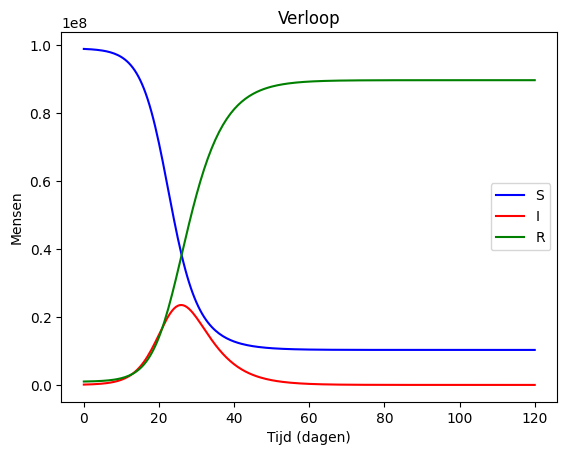

In [115]:
h = 0.5                       # days
transmission_coeff = 5e-9     # 1 / day person

end_time = 120.0              # days
num_steps = int(end_time / h)

def sir_model(h = 0.5):
    s = [1e8 - 1e6 - 1e5]
    i = [1e5]
    r = [1e6]
    t = [0]

    for step in range(num_steps):
        s2i = h * transmission_coeff * i[step] * s[step]
        i2r = h * 0.2 * i[step]
        
        t.append(t[step] + h)
        s.append(s[step] - s2i)
        i.append(i[step] + s2i - i2r)
        r.append(r[step]       + i2r)

    return s, i, r, t

s, i, r, t = sir_model()

plt.plot(t, s, 'b', label='S')
plt.plot(t, i, 'r', label='I')
plt.plot(t, r, 'g', label='R')
plt.legend()
plt.title("Verloop")
plt.xlabel("Tijd (dagen)")
plt.ylabel("Mensen")
plt.show()

## SEIR Model
- (Mogelijke) uitbreiding op SIR
- I wordt opgedeeld:
  - Exposed (besmet maar nog niet ziek of besmettelijk)
  - Infectious (ziek / besmettelijk)
- Infectie (S naar E) hangt af van I en een reproductiegetal
- E naar I hangt af van latency (vertraging)

![](SEIR.png)

$$S(t+h) = S(t) + h \cdot \frac{-5\times 10^{-9}}{day \cdot person} I(t) S(t)$$
$$E(t+h) = E(t) + h \left(\frac{5\times 10^{-9}}{day \cdot person} I(t) S(t) - \frac{1}{1\ day} E(t)\right)$$
$$I(t+h) = I(t) + h \cdot \left(\frac{1}{1\ day}E(t) - \frac{1}{5\ days} I(t)\right)$$
$$R(t+h) = R(t) + h \cdot \frac{1}{5\ days} I(t)$$


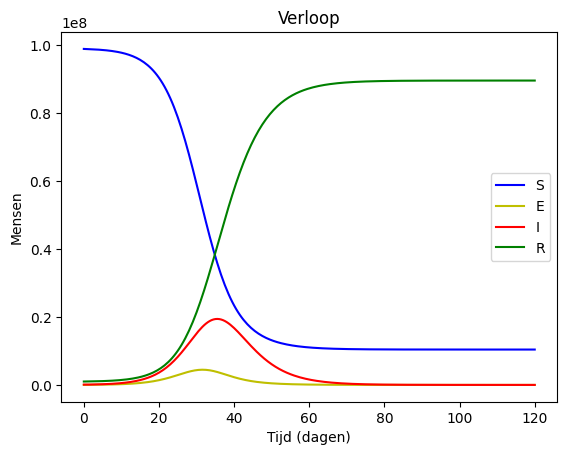

In [91]:
h = 0.5                       # days
transmission_coeff = 5e-9     # 1 / day person
latency = 1

end_time = 120.0              # days

def seir_model(h = 0.5):
    num_steps = int(end_time / h)
    s = [1e8 - 1e6 - 1e5]
    e = [0]
    i = [1e5]
    r = [1e6]
    t = [0]

    for step in range(num_steps):
        pass # TODO

    return s, e, i, r, t

s, e, i, r, t = seir_model(0.5) # 1.8

plt.plot(t, s, 'b', label='S')
plt.plot(t, e, 'y', label='E')
plt.plot(t, i, 'r', label='I')
plt.plot(t, r, 'g', label='R')
plt.legend()
plt.title("Verloop")
plt.xlabel("Tijd (dagen)")
plt.ylabel("Mensen")
plt.show()

## Zouttank
- Modelleren aantal kilo zout in de tank
- Makkelijker dan de concentratie bijhouden
- Omrekenen naar concentratie voor output (plot)
- Zout op $t=0$ is $0$
- Concentratie loopt op to $0.1 \text{kg} / \text{l}$

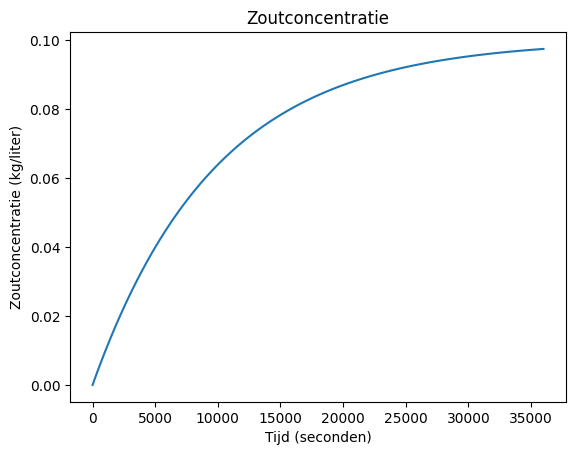

In [92]:
content = 1000             # liter
flow_in = 6 / 60           # liter / seconde
concentration_in = 0.1     # kg / liter
flow_out = 6 / 60          # liter / seconde
kg_in = concentration_in * flow_in  

num_steps = 100
h = 10 * 3600 / 100 # in seconden

salt = [0]

for step in range(num_steps):
    pass # TODO

plt.plot([t * h for t in range(num_steps+1)], [s / content for s in salt])
plt.title("Zoutconcentratie")
plt.xlabel("Tijd (seconden)")
plt.ylabel("Zoutconcentratie (kg/liter)")
plt.show()

## Extra Oefening: Alcoholafbraak

**De waardes in deze oefening zijn maar deels op de werkelijkheid gebaseerd (biology is complicated!), dus gebruik deze rekensom niet om je verkeersdeelname en/of alcoholconsumptie te baseren!**. Voor de eenheden in deze som geldt promilage (‰) als een getal berekend ten opzichte van de hoeveelheid vocht in een lichaam. Behandel deze waardes als concrete eenheden, dus $0.2‰ - 0.1‰ = 0.1‰$. Percentages worden wel behandeld als fracties, dus $0.5‰ - 20\% = 0.5‰ - 0.1‰ = 0.4‰$.

Alice drinkt tussen 2000 en 2100u $4$ glazen wijn. De twee uur hierna drinkt ze elk uur nog een enkel glas, waarna Alice stopt met drinken voor de avond. Gezien Alice' lichaamsgewicht komt ieder glas neer op $0.3‰$ alcohol. Vanaf het moment dat Alice begint met drinken wordt ieder uur alcohol een op een omgezet in acetaldehyde: $60\%$ van de hoeveelheid alcohol tot een maximum van $0.2‰$ per uur. Gelijktijdig wordt de acetaldehyde ook weer met $20\%$ per uur omgezet in azijnzuur (acetic acid). Azijnzuur wordt met $50\%$ per uur afgebroken tot lichaamseigen stoffen.

Vanaf welk tijdstip heeft Alice minder dan $0.5‰$ alchohol in haar bloed (de wettelijke grens voor verkeersdeelname)? Hoe lang duurt het tot de hoeveelheid acetaldehyde onder de $0.2‰$ komt en haar kater begint te verminderen?

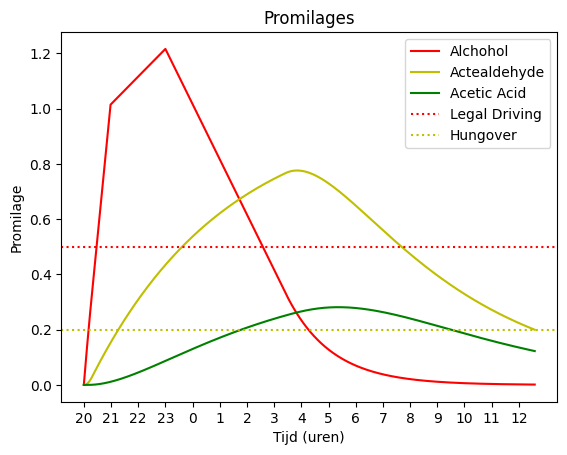

In [2]:
h = 1/60 # 1 minuut

alcohol = [0]
acetaldehyde = [0]
acetic_acid = [0]
time = [20]
t = 0

# While loop omdat we niet weten hoelang de simulatie duurt...
while alcohol[-1] > 0.5 or acetaldehyde[-1] > 0.2 or t < 6*60:
    pass # TODO
    
plt.plot(alcohol, 'r', label="Alchohol")
plt.plot(acetaldehyde, 'y', label="Actealdehyde")
plt.plot(acetic_acid, 'g', label="Acetic Acid")
plt.axhline(y = 0.5, color = 'r', linestyle = 'dotted', label="Legal Driving")
plt.axhline(y = 0.2, color = 'y', linestyle = 'dotted', label="Hungover")
plt.title("Promilages")
plt.xlabel("Tijd (uren)")
plt.ylabel("Promilage")
plt.legend()
plt.xticks(ticks= list(map(lambda x: x*60, range(1+t//60))), labels=map(lambda x: x % 24, range(20,21+t//60)))
plt.show()

# Les 4

## Agenda

- Terugblik les 3
- Wooclap
- Orbit in PyGame
- Stiffness
- Implicit Models / Backwards Euler
- Final Assignment

## Stiffness
- Hevige oscilatie op (te) grote stapgrootte, nog voor "exploderen"
- Zichtbaar in SEIR, niet in SIR
- Komt voor wanneer meerdere tijdschalen meespelen, en in formules van de vorm
$$\frac{dy}{dt} = -n \cdot y(t) \text{ met grote waardes voor } n$$.

- Hierdoor blijft de solver een "subtiele geul" overschieten, zoals bijvoorbeeld bij $\frac{dy}{dx} = -30 y$:

In [ ]:
def stiffness(h, y_min, y_max):
    total_time = 0.5
    num_steps = int(total_time / h)
    
    x = [1]
    y = [1]
    
    for step in range(1, num_steps+1):
        dx_dt = 1
        dy_dt = -30 * y[step-1]
        
        x.append(x[step-1] + h * dx_dt)
        y.append(y[step-1] + h * dy_dt)
    
        if y[-2] < 0:
            break
        
    x_grid = np.arange(-1, 2, 0.2)
    y_grid = np.arange(y_min, y_max, 0.2)
    X,Y = np.meshgrid(x_grid, y_grid)
    Ex = 1
    Ey = -30 * Y
    
    plt.quiver(X,Y,Ex,Ey, linewidth=None, color='#cccccc')
    
    plt.plot(x,y)
    plt.show()

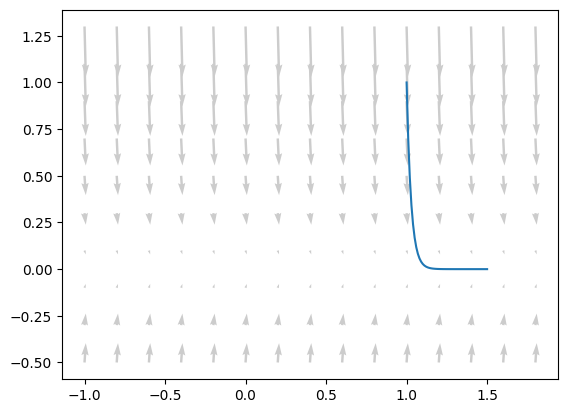

In [38]:
stiffness(0.01, y_min = -0.5, y_max = 1.5)

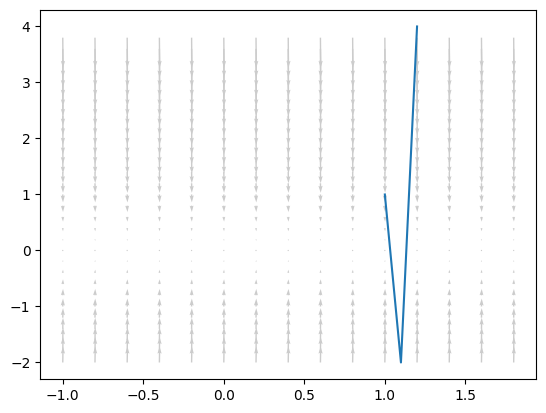

In [39]:
stiffness(0.1, y_min = -2, y_max = 4)

### Voorbeeld: Stiffness in SEIR

In [56]:
transmission_coeff = 5e-9     # 1 / day person
latency = 1

end_time = 120.0              # days

@interact(h=(0, 10, 0.1))
def simulation(h = 0.5):
    def seir_model(h):
        num_steps = int(end_time / h)
        s = [1e8 - 1e6 - 1e5]
        e = [0]
        i = [1e5]
        r = [1e6]
        t = [0]
    
        for step in range(num_steps):
    
            s2e = h * transmission_coeff * i[step] * s[step]
            e2i = h * latency * e[step]
            i2r = h * 0.2 * i[step]
    
            t.append(t[step] + h)
            s.append(s[step] - s2e)
            e.append(e[step] + s2e - e2i)
            i.append(i[step]       + e2i - i2r)
            r.append(r[step]             + i2r) 
    
        return s, e, i, r, t
    
    s, e, i, r, t = seir_model(h) # 1.8
    
    plt.plot(t, s, 'b', label='S')
    plt.plot(t, e, 'y', label='E')
    plt.plot(t, i, 'r', label='I')
    plt.plot(t, r, 'g', label='R')
    plt.legend()
    plt.title("Verloop")
    plt.xlabel("Tijd (dagen)")
    plt.ylabel("Mensen")
    plt.show()

interactive(children=(FloatSlider(value=0.5, description='h', max=10.0), Output()), _dom_classes=('widget-inte…

## Implicit Models - Backward Euler

- Bij Forward Euler wordt de waarde aan het begin van een interval gepakt als prognose voor het interval;
- bij Heun wordt het einde geschat, gemiddeld met het begin, en dit als prognose gebruikt;
- <span style="color: #00aaff">**bij Backward Euler nemen we de waarde aan het einde als prognose.**</span>

Neemt de verandering binnen het interval snel af (= stiffness) dan is de verandering aan het einde een betere indicator.

<span style="color: #00aaff">... maar die weten we nog niet :-/</span>

### Voorbeeld: Auto
$$W(t+h) = W(t)\ { \color{red} -\ 0.1 } \cdot h \cdot { \color{red} W(t) }$$
#### Backward Euler
$$W(t+h) = W(t)\ { \color{red} -\ 0.1 } \cdot h \cdot { \color{red} W(t+h) }$$

&nbsp;

<span style="color: #00aaff">**Nu herschrijven naar een formuler zonder $W(t+h)$**</span>

&nbsp;

Beide kanten $0.1 h \cdot W(t+h)$ erbij
$$W(t+h) + 0.1 h \cdot W(t+h) = W(t)$$
Distributie
$$W(t+h)(1 + 0.1h) = W(t)$$
Beide kanten delen door $1+0.1 h$
$$W(t+h) = \frac{W(t)}{1+0.1 h}$$

### Oefenen: Miereneter en Chemisch Vat

Pas Backward Euler toe op de voorbeelden van de Miereneter en het Chemische Vat.

### Oplossing: Miereneter
$$A(t+h) = A(t) + h \cdot (1000 - 0.2 \cdot A(t))$$
##### Backward Euler
$$A(t+h) = A(t) + 1000h - 0.2 h \cdot A(t+h)$$
##### Beide kanten $0.2 h \cdot A(t+h)$ erbij
$$A(t+h) + 0.2 h \cdot A(t+h) = A(t) + 1000h$$
##### Distributie
$$A(t+h)(1 + 0.2h) = A(t) + 1000h$$
##### Beide kanten delen door $1+0.2 h$
$$A(t+h) = \frac{A(t)+1000h}{1+0.2 h}$$

### Oplossing: Chemisch Vat
$$C(t+h) = C(t) + h \cdot (5 - 0.15 \cdot C(t))$$
##### Backward Euler
$$C(t+h) = C(t) + 5h - 0.15 h \cdot C(t+h)$$
##### Beide kanten $0.15 h \cdot C(t+h)$ erbij
$$C(t+h) + 0.15 h \cdot C(t+h) = C(t) + 5h$$
##### Distributie
$$C(t+h)(1 + 0.15h) = C(t) + 5h$$
##### Beide kanten delen door $1+0.15 h$
$$C(t+h) = \frac{C(t)+5h}{1+0.15 h}$$

## Final Assignment

![](fa1.png)

## Backwards Euler voor SEIR

### Removed
$$R(t+h) = R(t) + h \cdot \frac{1}{5\ days} I(h)$$
##### Opschonen
$$R_2 = R_1 + h \cdot \zeta I_1$$
### Susceptible
$$S(t+h) = S(t) + h \cdot \frac{-5\times 10^{-9}}{day \cdot person} I(t) S(t)$$
##### Opschonen
$$S_2 = S_1 + h \cdot (-\beta I_1 S_1)$$
### Infected
$$I(t+h) = I(t) + h \cdot \left(\frac{1}{1\ day}E(t) - \frac{1}{5\ days} I(t)\right)$$
##### Opschonen
$$I_2 = I_1 + h \cdot \left(\lambda E_1 - \zeta I_1\right)$$
### Exposed
$$E(t+h) = E(t) + h \left(\frac{5\times 10^{-9}}{day \cdot person} I(t) S(t) - \frac{1}{1\ day} E(t)\right)$$
##### Opschonen
$$E_2 = E_1 + h \left(\beta I_1 S_1 - \lambda E_1\right)$$

$$$$

$$$$

$$$$

$$$$

### Removed
$$R(t+h) = R(t) + h \cdot \frac{1}{5\ days} I(h)$$
##### Opschonen
$$R_2 = R_1 + h \cdot \zeta I_1$$
#### Backward Euler
$$R_2 = R_1 + h \cdot \zeta I_2$$

### Susceptible
$$S(t+h) = S(t) + h \cdot \frac{-5\times 10^{-9}}{day \cdot person} I(t) S(t)$$
##### Opschonen
$$S_2 = S_1 + h \cdot (-\beta I_1 S_1)$$
#### Backward Euler
$$S_2 = S_1 + h \cdot (-\beta I_2 S_2)$$
##### Beide kanten $h \cdot -(\beta I_2 S_2)$ eraf
$$S_2 - h \cdot (-\beta I_2 S_2) = S_1$$
##### Dubbele inverse
$$S_2 + h \cdot \beta I_2 S_2 = S_1$$
##### Distributie
$$S_2 \left(1 + h \cdot \beta I_2\right) = S_1$$
##### Beide kanten delen door $1+h\cdot \beta I_2$
$$S_2 = \frac{S_1}{1 + h \cdot \beta I_2}$$

### Infected
$$I(t+h) = I(t) + h \cdot \left(\frac{1}{1\ day}E(t) - \frac{1}{5\ days} I(t)\right)$$
##### Opschonen
$$I_2 = I_1 + h \cdot \left(\lambda E_1 - \zeta I_1\right)$$
#### Backward Euler
$$I_2 = I_1 + h \left(\lambda E_2 - \zeta I_2\right)$$
##### Distributie
$$I_2 = I_1 + h \lambda E_2 - h \zeta I_2$$
##### Beide kanten $h \zeta I_2$ erbij
$$I_2 + h \zeta I_2 = I_1 + h \lambda E_2$$
##### Distributie
$$\left(1 + h \zeta\right) I_2 = I_1 + h \lambda E_2$$
##### Beide kanten delen door $ 1+h \zeta$
$$I_2 = \frac{I_1 + h \lambda E_2}{1 + h \zeta}$$

### Exposed
$$E(t+h) = E(t) + h \left(\frac{5\times 10^{-9}}{day \cdot person} I(t) S(t) - \frac{1}{1\ day} E(t)\right)$$
##### Opschonen
$$E_2 = E_1 + h \left(\beta I_1 S_1 - \lambda E_1\right)$$
##### Backward Euler
$$E_2 = E_1 + h \left(\beta I_2 S_2 - \lambda E_2\right)$$
##### Distributie
$$E_2 = E_1 + h \cdot \beta I_2 S_2 - h \cdot \lambda E_2$$
##### Beide kanten $h \cdot \lambda E_2$ erbij
$$E_2 + h \cdot \lambda E_2 = E_1 + h \cdot \beta I_2 S_2$$
##### Distributie
$$E_2 (1 + h \cdot \lambda) = E_1 + h \cdot \beta I_2 S_2$$
##### Beide kanten delen door $1 + h \cdot \lambda$
$$E_2 = \frac{E_1 + h \cdot \beta I_2 S_2}{1 + h \cdot \lambda}$$

![](final_form.png)

### Probleem
- Dit werkt op het niveau van een enkele DE, maar in een systeem van DEs houden we circulaire afhankelijkheden. 

$$R_2 = R_1 + h \cdot \zeta I_2$$

$$S_2 = \frac{S_1}{1 + h \cdot \beta I_2}$$

$$I_2 = \frac{I_1 + h \lambda E_2}{1 + h \zeta}$$

$$E_2 = \frac{E_1 + h \cdot \beta I_2 S_2}{1 + h \cdot \lambda}$$

### Oplossing
De oplossing is om de afhankelijkheden (in een van de formules) te vervangen door de definities, net zo lang totdat we alleen nog termen op $t = 1$ en $E_2$ overhouden. Als we deze kunnen isoleren kunnen we de differentiaalvergelijking uitprogrammeren.

De onderstaande cel is verborgen om de gevoelige lezer te beschermen. De cel bevat (een mogelijke) afleiding van de formule van $E_2$ waar alleen gebruik gemaakt wordt van $S_1$, $I_1$ en $E_1$ en constanten.

***Here be dragons.***

$$$$

$$$$

$$$$

$$$$

$$$$

$$$$

$$$$

*Still here?*

We gaan zo de som van twee formules nemen. Eerst zetten we ze alletwee in Backwards Euler vorm:

$$E_2 = E_1 + h \beta I_1 S_1 - h \lambda E_1$$

$$S_2 = S_1 - h \beta I_1 S_1$$

wordt

$$E_2 = E_1 + h \beta I_2 S_2 - h \lambda E_2$$

$$S_2 = S_1 - h \beta I_2 S_2$$

Nu nemen we de som van de formules voor $E_2$ en $S_2$. Dit stelt ons in staat het een en ander tegen elkaar weg te strepen.

$$\begin{align} E_2 + S_2 & = E_1 + h \beta I_2 S_2 - h \lambda E_2 + S_1 - h \beta I_2 S_2 \\
 & = E_1 + S_1 - h \lambda E_2 \end{align}$$

Dan vervangen we de waarde $S_2$ door de definitie die we hebben gevonden, waardoor we $E_2$ uit kunnen drukken in $I_2$, die we ook weer vervangen door de definitie van $I_2$. Hiermee zijn we alle toekomstige waardes kwijt behalve $E_2$.

$$E_2 + S_2 = E_1 + S_1 - h \lambda E_2$$

$$S_2 = \frac{S_1}{1 + h \cdot \beta I_2}$$

Samen:

$$E_2 + \frac{S_1}{1 + h \cdot \beta I_2} = E_1 + S_1 - h \lambda E_2$$

Dan $I_2$ erbij

$$I_2 = \frac{I_1 + h \lambda E_2}{1 + h \zeta}$$

geeft samen:

$$E_2 + \frac{S_1}{1 + h \beta \frac{I_1 + h \lambda E_2}{1 + h \zeta}} = E_1 + S_1 - h \lambda E_2$$

Nu willen we proberen alle $E_2$ termen te isoleren. Haal eerst $h\beta$ binnen de breuk.

$$E_2 + \frac{S_1}{1 + \frac{h \beta I_1 + h^2 \beta  \lambda E_2}{1 + h \zeta}} = E_1 + S_1 - h \lambda E_2$$

We kunnen $1$ vervangen door een breuk met dezelfde deler en noemer. Door $1 + h \zeta$ te kiezen krijgen we een breuk die bij de andere op te tellen is:

$$E_2 + \frac{S_1}{\frac{1 + h \zeta}{1 + h \zeta} + \frac{h \beta I_1 + h^2 \beta  \lambda E_2}{1 + h \zeta}} = E_1 + S_1 - h \lambda E_2$$

$$E_2 + \frac{S_1}{\frac{1 + h \zeta + h \beta I_1 + h^2 \beta  \lambda E_2}{1 + h \zeta}} = E_1 + S_1 - h \lambda E_2$$

Delen door een breuk is vermenigvuldigen met het omgekeerde:

$$E_2 + \frac{(1 + h \zeta) S_1}{1 + h \zeta + h \beta I_1 + h^2 \beta  \lambda E_2} = E_1 + S_1 - h \lambda E_2$$

We halen de breuk naar een kant en vermenigvuldigen beide kanten met de deler om de breuk weg te werken:

$$\frac{(1 + h \zeta) S_1}{1 + h \zeta + h \beta I_1 + h^2 \beta  \lambda E_2} =  E_1 + S_1 - E_2 - h \lambda E_2$$

$$(1 + h \zeta) S_1 = (1 + h \zeta + h \beta I_1 + h^2 \beta  \lambda E_2) (E_1 + S_1 - E_2 - h \lambda E_2) $$

Nu kunnen we de hele vermenigvuldigingen uitschrijven, maar we besparen ons wat schrijfwerk door alleen de relevante termen eruit te halen. Eerst distributie over de tweede term van de vermenigvuldiging om de delen met en zonder $E_2$ van elkaar te scheiden:

$$\begin{align}(1 + h \zeta) S_1
& = (1 + h \zeta + h \beta I_1 + h^2 \beta  \lambda E_2)(- E_2 - h \lambda E_2) \\
& + (1 + h \zeta + h \beta I_1 + h^2 \beta  \lambda E_2) (E_1 + S_1) \end{align}$$

(in twee stappen voor de navolgbaarheid)

$$\begin{align}(1 + h \zeta) S_1
& = -(1 + h \lambda) (1 + h \zeta + h \beta I_1 + h^2 \beta  \lambda E_2)E_2 \\
& + (1 + h \zeta + h \beta I_1 + h^2 \beta  \lambda E_2) (E_1 + S_1) \end{align}$$

Distributie op de eerste term van de laatste regel:

$$\begin{align}(1 + h \zeta) S_1
& = -(1 + h \lambda) (1 + h \zeta + h \beta I_1 + h^2 \beta  \lambda E_2) E_2 \\
& + (1 + h \zeta + h \beta I_1) (E_1 + S_1) \\
& + h^2 \beta  \lambda E_2 (E_1 + S_1) \end{align}$$

Nog eenmaal distributie op de eerste regel: we hebben hier $(\varphi + \psi E_2) E_2)$, en daarmee kunnen we $\varphi E_2 + \psi E_2 E_2$ maken, oftewel $\varphi E_2 + \psi (E_2)^2$. De variabelen $\varphi$ en $\psi$ zijn de complexere daadwerkelijke formules die ik voor de leesbaarheid even afkort in de uitleg.

$$\begin{align}(1 + h \zeta) S_1
& = -(1 + h \lambda) (1 + h \zeta + h \beta I_1) E_2\\
& -(1 + h \lambda) h^2 \beta  \lambda (E_2)^2 \\
& + (1 + h \zeta + h \beta I_1) (E_1 + S_1) \\
& + h^2 \beta  \lambda E_2 (E_1 + S_1) \end{align}$$

Nu kunnen we de boel een beetje op volgorde zetten van voorkomen van de term $E_2$ - eigenlijk hebben we hier een heel harige kwadratische polynoom gemaak. Realiseer je dat vrijwel alle termen (bevale $E_2$, waar we naar op zoek zijn) op het moment van berekenen constant zullen zijn. De Griekse letters staan sowieso voor constanten, de termen $I_1$, $E_1$ en $S_1$ zijn al eerder berekend, en $h$ kunnen we variabel kiezen als we de simulatie draaien, maar zal niet middenin een berekening binnen een stap veranderen. Eigenlijk staat hier dus iets van de vorm $ax^2 + bx +c$, met vrij complexe $a$, $b$ en $c$.

$$\begin{align}(1 + h \zeta) S_1
& -(1 + h \lambda) h^2 \beta  \lambda (E_2)^2 \\
& = -(1 + h \lambda) (1 + h \zeta + h \beta I_1) E_2\\
& + h^2 \beta  \lambda (E_1 + S_1) E_2 \\
& + (1 + h \zeta + h \beta I_1) (E_1 + S_1) \end{align}$$

Vervolgens halen we alles naar een kant, zodat de andere kant $0$ is.


$$\begin{align}
& (1 + h \lambda) h^2 \beta  \lambda (E_2)^2 \\
& - \big(h^2 \beta  \lambda (E_1 + S_1) -(1 + h \lambda) (1 + h \zeta + h \beta I_1)\big) E_2\\
& - (E_1 + S_1) (1 + h \zeta + h \beta I_1) - (1 + h \zeta) S_1 \\
& = 0 \end{align}$$

Hier kunnen we de formule zien als $a(E_2)^2 + bE_2 + c = 0$. Dit is een "simpele" kwadratische formule die we op kunnen lossen een standaard formule. Ik gebruik de variant van [3Blue1Brown's Lockdown Math video](https://www.youtube.com/watch?v=MHXO86wKeDY). Hiermee komen we op de volgende waardes voor $a$, $b$ en $c$.

$$a = (1 + h \lambda) h^2 \beta  \lambda$$

$$b = - h^2 \beta  \lambda (E_1 + S_1) - (1 + h \lambda) (1 + h \zeta + h \beta I_1)$$

$$c = - (1 + h \zeta + h \beta I_1) (E_1 + S_1) - (1 + h \zeta) S_1$$

We schalen $b$ en $c$ door de hele formule door $a$ te delen zodat we uitkomen op $(E_2)^2 + \frac{b}{a}E_2 + \frac{b}{a} = 0$. Nul mogen we door $a$ delen en dit blijft nul. De term bij het kwadraat was $a$, dus gedeeld door $a$ wordt dit $1$.

$$b^\prime = - \frac{h^2 \beta  \lambda (E_1 + S_1) + (1 + h \lambda) (1 + h \zeta + h \beta I_1)}{(1+h \lambda) h^2 \beta \lambda}$$

$$c^\prime = - \frac{(1 + h \zeta + h \beta I_1) (E_1 + S_1) + (1 + h \zeta) S_1}{(1+h \lambda) h^2 \beta \lambda}$$

Met deze waardes kunnen we een middelpunt $m$ berekenen van de twee oplossingen van de kwadratische vergelijking:

$$m = \frac{b^\prime}{2} = \frac{b}{2a} = -\frac{h^2 \beta  \lambda (E_1 + S_1) + (1 + h \lambda) (1 + h \zeta + h \beta I_1)}{2(1+h \lambda) h^2 \beta \lambda}$$

De afstand van de twee oplossingen van het middelpunt $m$ worden gegeven door de afstand $d$:

$$d = \sqrt{m^2-p} = \sqrt{\frac{b}{2a}^2 - \frac{c}{a}} = \sqrt{\frac{b^2}{4a^2} - \frac{4ac}{4a^2}} = \sqrt{\frac{b^2-4ac}{4a^2}}$$

$$E_2 = m \pm d$$

## Waning Immunity

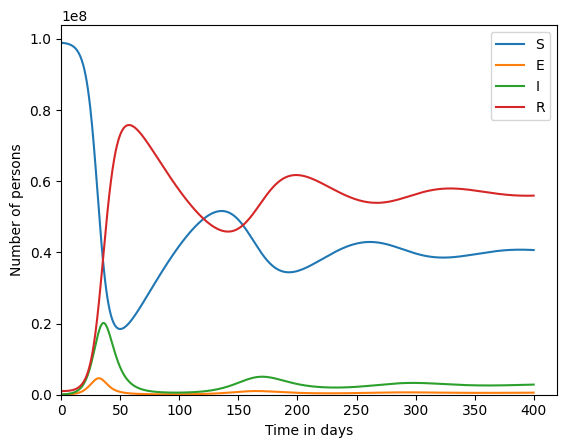

In [72]:
h = 0.5 # days
transmission_coeff = 5e-9 # 1 / day person
infectious_time = 5. # days
latency_time = 1. # dit is het aantal dagen dat het duurt van besmetting tot besmettelijk
end_time = 400.0 # days; we laten de simulatie iets langer lopen om te kijken of er een evenwicht ontstaat
num_steps = int(end_time / h)

def seir_model():
    t = [0]
    s = [1e8 - 1e6 - 1e5]
    e = [0]
    i = [1e5]
    r = [1e6]
    for step in range(1, num_steps + 1):
        s2e = transmission_coeff * s[step-1] * i[step-1]
        e2i = 1 / latency_time * e[step-1]
        i2r = 1 / infectious_time * i[step-1]
        i2s = 1/100 * r[step-1]  # 1 honderdste per dag, niet exact na honderd dagen
        
        s.append(s[step-1] + h * (i2s - s2e))
        e.append(e[step-1] + h * (s2e - e2i))
        i.append(i[step-1] + h * (e2i - i2r))
        r.append(r[step-1] + h * (i2r - i2s))
        t.append(t[step - 1] + h)
    return t, s, e, i, r
    
t, s, e, i, r = seir_model()

def plot_me():
    s_plot = plt.plot(t, s, label='S')
    e_plot = plt.plot(t, e, label='E')
    i_plot = plt.plot(t, i, label='I')
    r_plot = plt.plot(t, r, label='R')
    
    plt.legend(('S', 'E', 'I', 'R'), loc='upper right')
    axes = plt.gca()
    axes.set_xlabel('Time in days')
    axes.set_ylabel('Number of persons')
    plt.xlim(xmin=0.)
    plt.ylim(ymin=0.)
    plt.show()
    
plot_me()

$$\frac{df}{dt} = a \cdot f(t) + c$$

#

$$f_E = f(t) + h \cdot (a \cdot f(t) + c)$$
$$f_H = f(t) + h \cdot \frac{\big(a \cdot f(t) + c + a \cdot f_E + c \big)}{2}$$


#

$$f^\prime_1 = a \cdot f(t) + c$$
$$f_E = f(t) + h \cdot f^\prime_1$$
$$f^\prime_2 = a \cdot f_E + c$$
$$f_H = f(t) + h \cdot \frac{f^\prime_1 + f^\prime_2}{2}$$